In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [4]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Check the shapes of the loaded data
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 39s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [33]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

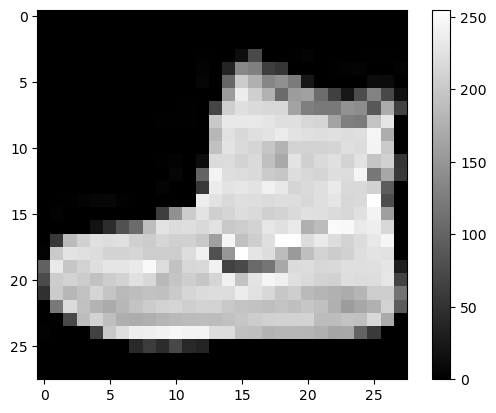

Ankle boot


In [8]:
# Display a sample image from the dataset
plt.figure()
plt.imshow(train_images[0], cmap="gray")
plt.colorbar()
plt.show()
print(train_labels_names[train_labels[0]])

In [10]:
# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [12]:
train_images.shape[1:3] # shape of image pixels(28x28)

(28, 28)

In [14]:
# Reshape the images to specify the channel(1 --> grayscale, 3--> RGB)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Check the new shape of the data
print("Training images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Training images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [18]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

C:\Users\somal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


C:\Users\somal\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.7308 - loss: 0.7548 - val_accuracy: 0.8590 - val_loss: 0.3835
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8585 - loss: 0.3928 - val_accuracy: 0.8732 - val_loss: 0.3382
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8791 - loss: 0.3327 - val_accuracy: 0.8877 - val_loss: 0.3071
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8886 - loss: 0.3000 - val_accuracy: 0.8965 - val_loss: 0.2840
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8998 - loss: 0.2756 - val_accuracy: 0.9003 - val_loss: 0.2695
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9038 - loss: 0.2585 - val_accuracy: 0.9003 - val_loss: 0.2679
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9126 - loss: 0.2362 - val_accuracy: 0.9023 - val_loss: 0.2627
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9167 - loss: 0.22

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9086999893188477


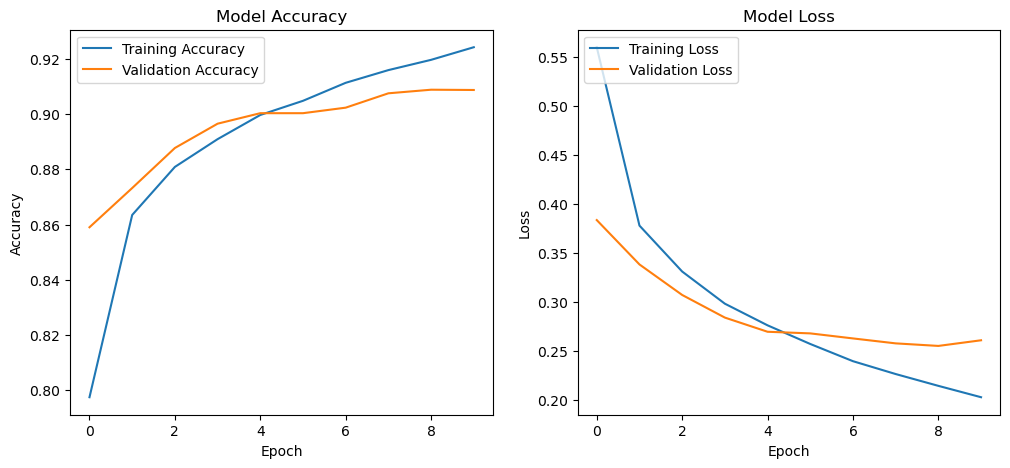

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

###  Testing the model

In [29]:
import numpy as np

test_image = test_images[200]
test_image = np.expand_dims(test_image, axis=0)
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


In [31]:
predicted_class

1

In [35]:
class_labels[1]

'Trouser'

### LeNet

In [40]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout

In [50]:
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), padding='same'),
    AveragePooling2D(pool_size=(2,2)),
    Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    AveragePooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])

In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.7590 - loss: 0.6741 - val_accuracy: 0.8327 - val_loss: 0.4492
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8630 - loss: 0.3804 - val_accuracy: 0.8653 - val_loss: 0.3682
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8801 - loss: 0.3267 - val_accuracy: 0.8693 - val_loss: 0.3563
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8873 - loss: 0.3015 - val_accuracy: 0.8793 - val_loss: 0.3312
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8948 - loss: 0.2820 - val_accuracy: 0.8791 - val_loss: 0.3268
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9037 - loss: 0.2628 - val_accuracy: 0.8807 - val_loss: 0.3234
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9087 - loss: 0.2450 - val_accuracy: 0.8861 - val_loss: 0.3181
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9162 - lo